In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")

In [3]:
test = pd.read_csv("test.csv")

In [4]:
def data_desc(df):
    '''
    df: Dataframe of the dataset
    '''
    print("Rows: ", df.shape[0])
    print("Columns: ", df.shape[1])
    print("Information: ")
    print(df.info())
    print(df.describe())
    print("Input Features: ", df.columns.tolist())

In [5]:
data_desc(train)

Rows:  8523
Columns:  12
Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
 

In [8]:
data_desc(test)

Rows:  5681
Columns:  11
Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
None
       Item_Weight  Item_Visibility     Item_MRP  Outlet_

In [6]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


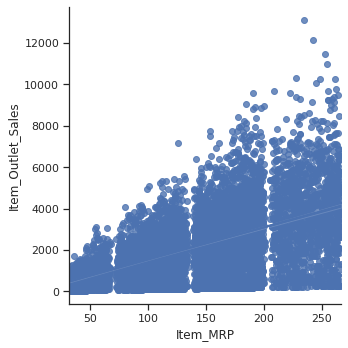

In [17]:
# The item sales increases with increasing MRP, hence higher prices products have greater sales
sns.set(style="ticks")
sns.lmplot(x="Item_MRP", y="Item_Outlet_Sales", data=train)

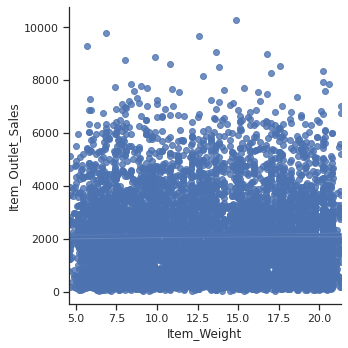

In [18]:
# There is no clear relation between item weight and the outlet sales
sns.lmplot(x="Item_Weight", y="Item_Outlet_Sales", data=train)

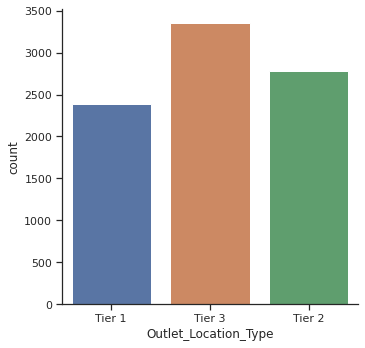

In [22]:
# Tier 3 locations are maximum
sns.factorplot("Outlet_Location_Type", data=train, kind="count")

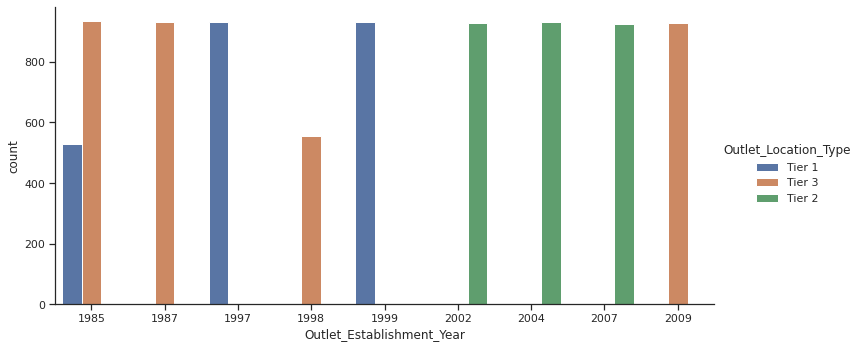

In [27]:
sns.factorplot("Outlet_Establishment_Year", hue='Outlet_Location_Type', kind='count', data=train, aspect=2)

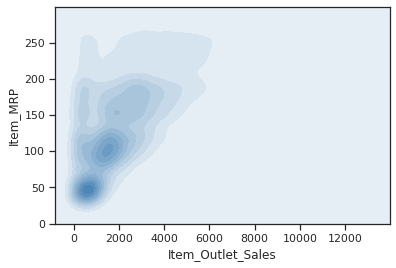

In [29]:
# Low Cost Products have dense sales too
sns.kdeplot(train["Item_Outlet_Sales"], train["Item_MRP"], color="steelblue", shade=True)

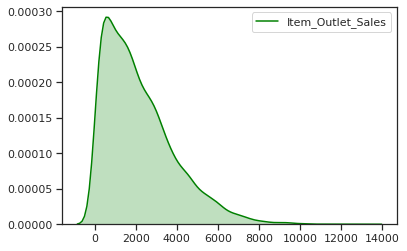

In [30]:
# One Tailed Distributed almost normally
sns.kdeplot(train["Item_Outlet_Sales"], color="green", shade=True)

<Figure size 1800x1080 with 0 Axes>

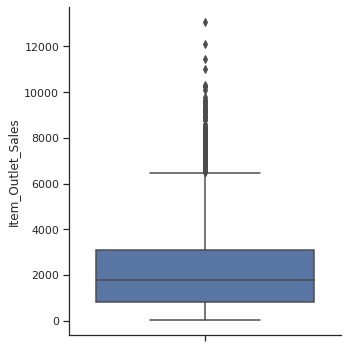

In [38]:
# There are many outliers in the sales data
sns.catplot(kind="box", y="Item_Outlet_Sales", data=train)

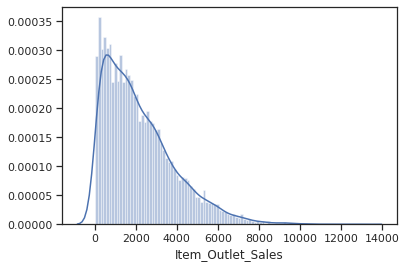

In [42]:
sns.distplot(train["Item_Outlet_Sales"], bins=100)

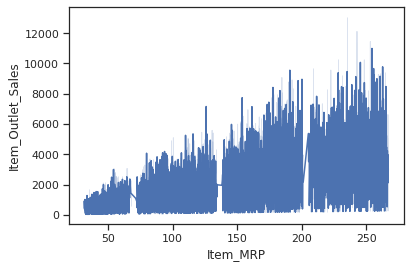

In [44]:
sns.lineplot(x="Item_MRP", y="Item_Outlet_Sales", data=train)

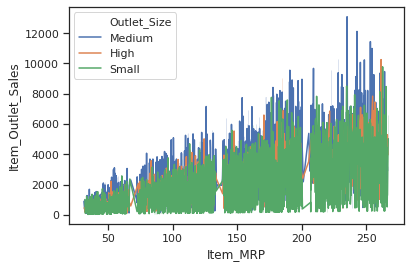

In [45]:
sns.lineplot(x="Item_MRP", y="Item_Outlet_Sales", data=train, hue="Outlet_Size")

Text(0, 0.5, 'Item Sales')

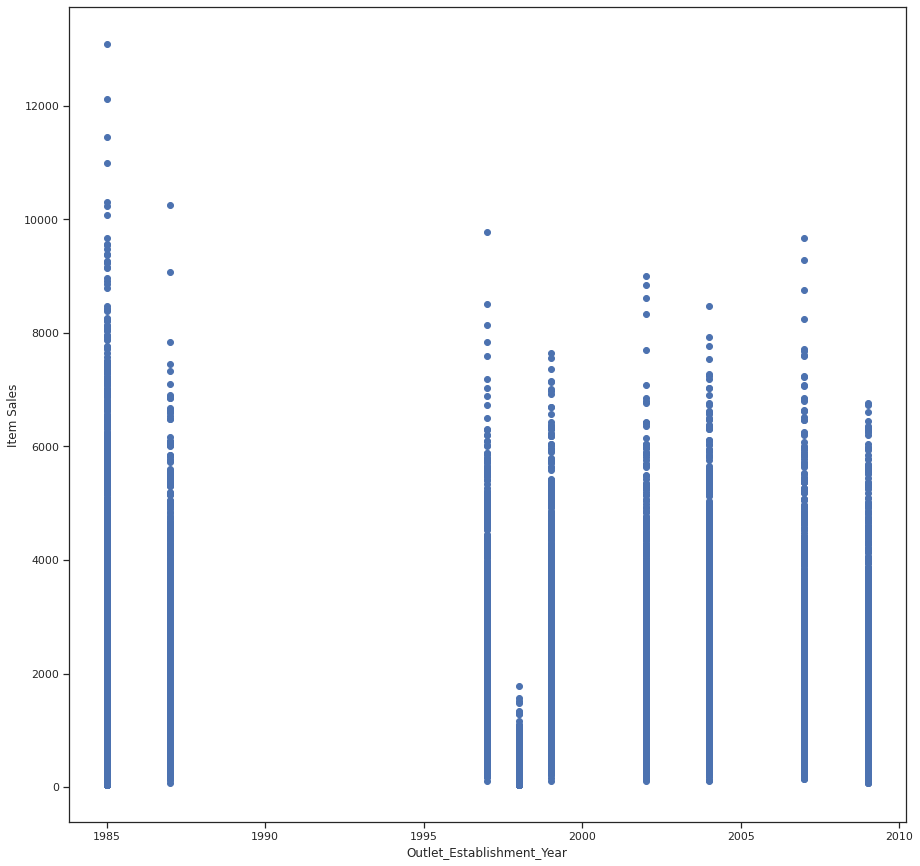

In [47]:
plt.figure(figsize=(15,15))
plt.scatter(x=train.Outlet_Establishment_Year, y=train.Item_Outlet_Sales)
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Item Sales")

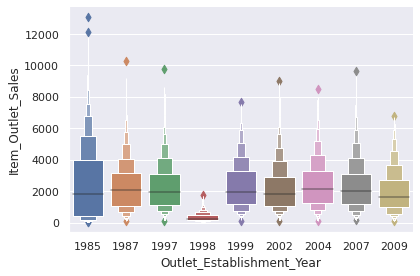

In [54]:
# Highest Sales occured in 1985, 1987 and 2007
sns.catplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', kind='boxen', data=train, height=4, aspect=1.5)

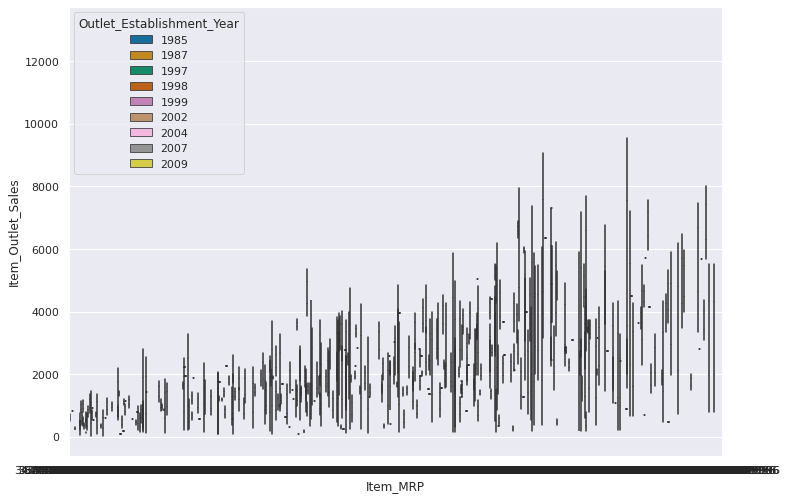

In [55]:
sns.boxplot(y='Item_Outlet_Sales', x='Item_MRP', data=train, palette='colorblind', hue='Outlet_Establishment_Year')

In [56]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [187]:
cat_train = train.select_dtypes(include=['object'])

In [188]:
cat_train.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [189]:
cat_train.isna().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [190]:
cat_train = cat_train.fillna(cat_train["Outlet_Size"].value_counts().index[0])

In [191]:
cat_train.isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

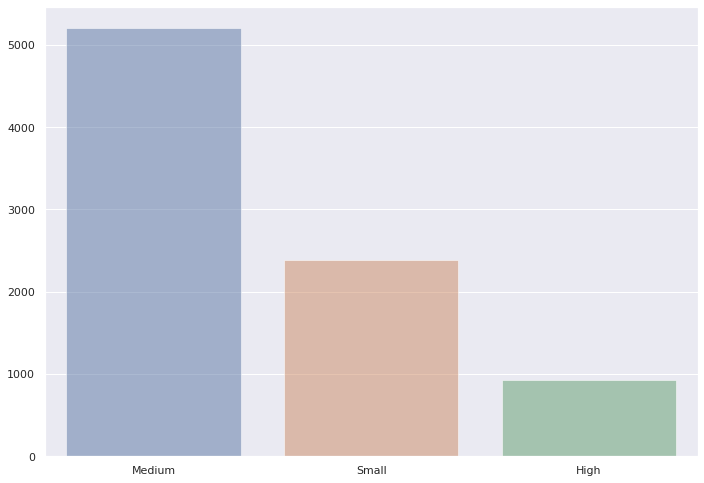

In [192]:
outlet_count = cat_train.Outlet_Size.value_counts()
sns.barplot(x=outlet_count.index, y=outlet_count.values, alpha=0.5)

In [193]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
cat_train = cat_train.apply(LabelEncoder().fit_transform)

In [194]:
cat_train.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,1,4,9,1,0,1
1,8,2,14,3,1,2,2
2,662,1,10,9,1,0,1
3,1121,2,6,0,1,2,0
4,1297,1,9,1,0,2,1


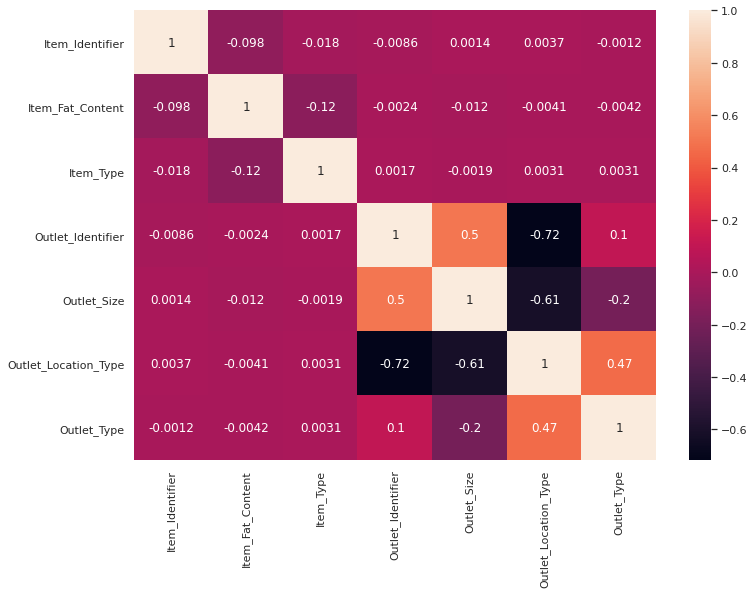

In [195]:
corr = cat_train.corr(method="pearson")
sns.heatmap(corr, annot=True)

In [196]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cat_train[['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']] = sc.fit_transform(cat_train[['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']])

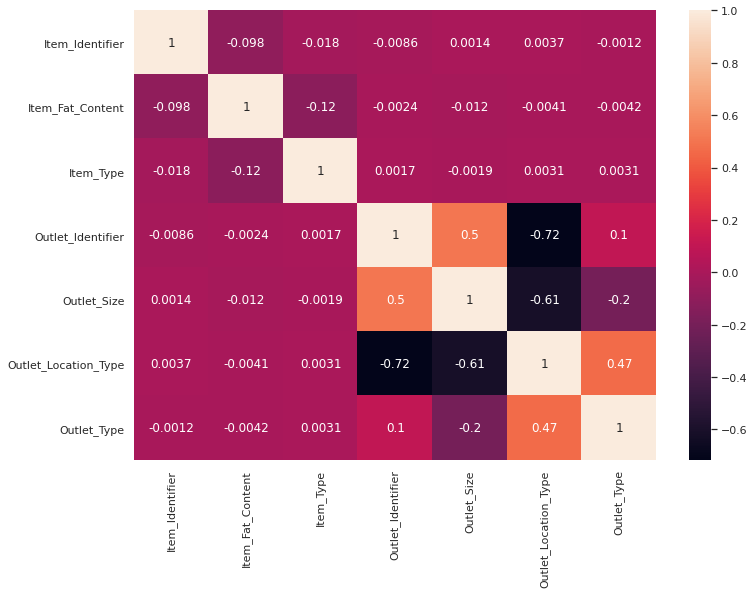

In [198]:
corr = cat_train.corr(method="pearson")
sns.heatmap(corr, annot=True)

In [199]:
cat_train["Outlet_Identifier_Size"] = (cat_train["Outlet_Identifier"] + cat_train["Outlet_Size"])/2

In [201]:
cat_train = cat_train.drop(columns=["Outlet_Identifier", "Outlet_Size"], axis=1)

In [205]:
cat_train['Outlet_Location_Type'] = (cat_train['Outlet_Location_Type'] + cat_train['Outlet_Type'])/2

In [206]:
cat_train = cat_train.drop(columns='Outlet_Type')
cat_train.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Location_Type,Outlet_Identifier_Size
0,-1.388514,-0.572844,-0.766479,-0.810996,0.611616
1,-1.717991,0.978092,1.608963,1.047271,-0.445826
2,-0.262057,-0.572844,0.658786,-0.810996,0.611616
3,0.759769,0.978092,-0.291391,-0.208360,-0.974547
4,1.151580,-0.572844,0.421242,0.419455,-1.631234


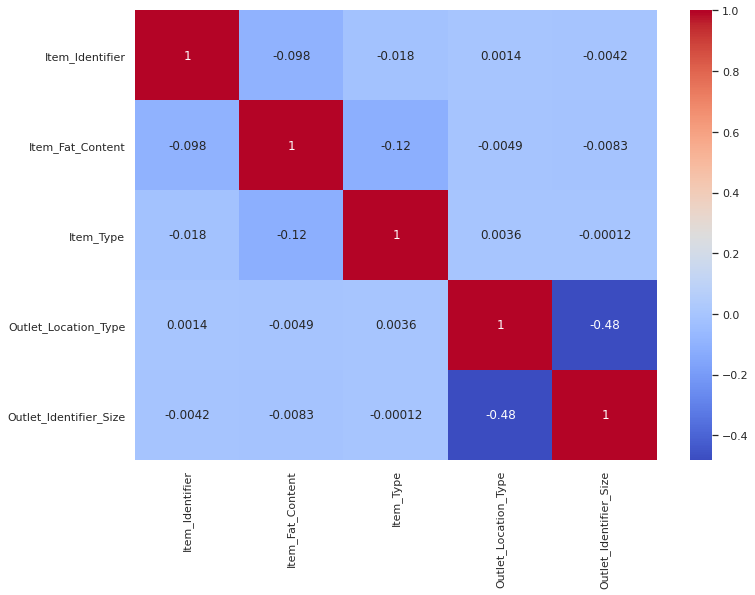

In [207]:
sns.heatmap(cat_train.corr(), cmap='coolwarm', annot=True)

In [208]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [238]:
num_train = train.select_dtypes(include=['float64'])
num_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.016047,249.8092,3735.1380
1,5.92,0.019278,48.2692,443.4228
2,17.50,0.016760,141.6180,2097.2700
3,19.20,0.000000,182.0950,732.3800
4,8.93,0.000000,53.8614,994.7052


In [239]:
num_train.isna().sum()

Item_Weight          1463
Item_Visibility         0
Item_MRP                0
Item_Outlet_Sales       0
dtype: int64

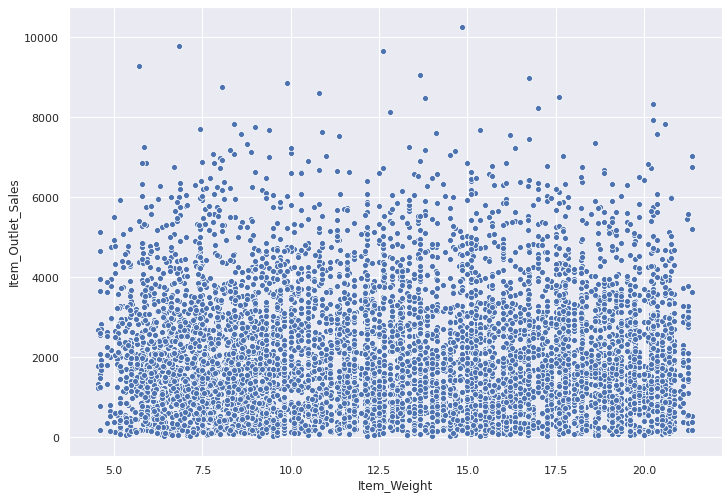

In [241]:
sns.scatterplot(data=num_train, x="Item_Weight", y="Item_Outlet_Sales")

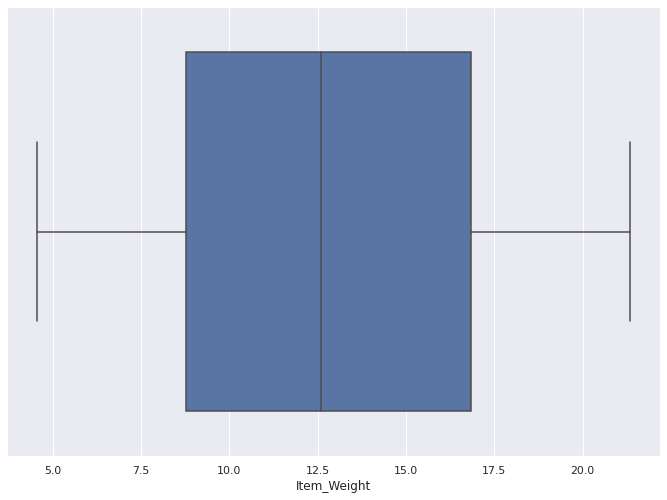

In [242]:
sns.boxplot('Item_Weight', data=num_train)

In [251]:
med = num_train["Item_Weight"].median()

In [255]:
num_train = num_train.replace(r'^\s*$', np.nan, regex=True)

In [257]:
num_train.Item_Weight = num_train.Item_Weight.fillna(med)

In [258]:
num_train.isna(0.sum())

Item_Weight          0
Item_Visibility      0
Item_MRP             0
Item_Outlet_Sales    0
dtype: int64

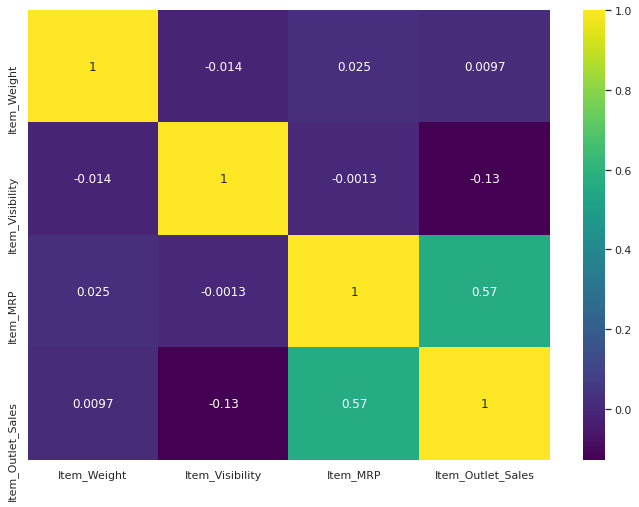

In [259]:
sns.heatmap(num_train.corr(), annot=True, cmap='viridis')

In [260]:
cat_train.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Location_Type,Outlet_Identifier_Size
0,-1.388514,-0.572844,-0.766479,-0.810996,0.611616
1,-1.717991,0.978092,1.608963,1.047271,-0.445826
2,-0.262057,-0.572844,0.658786,-0.810996,0.611616
3,0.759769,0.978092,-0.291391,-0.208360,-0.974547
4,1.151580,-0.572844,0.421242,0.419455,-1.631234


In [261]:
num_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.016047,249.8092,3735.1380
1,5.92,0.019278,48.2692,443.4228
2,17.50,0.016760,141.6180,2097.2700
3,19.20,0.000000,182.0950,732.3800
4,8.93,0.000000,53.8614,994.7052


In [262]:
final_train = pd.concat([cat_train, num_train], axis=1)

In [358]:
final_train

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Location_Type,Outlet_Identifier_Size,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,-1.388514,-0.572844,-0.766479,-0.810996,0.611616,9.300,0.016047,249.8092,3735.1380
1,-1.717991,0.978092,1.608963,1.047271,-0.445826,5.920,0.019278,48.2692,443.4228
2,-0.262057,-0.572844,0.658786,-0.810996,0.611616,17.500,0.016760,141.6180,2097.2700
3,0.759769,0.978092,-0.291391,-0.208360,-0.974547,19.200,0.000000,182.0950,732.3800
4,1.151580,-0.572844,0.421242,0.419455,-1.631234,8.930,0.000000,53.8614,994.7052
...,...,...,...,...,...,...,...,...,...
8518,-0.912107,-0.572844,1.371418,0.419455,-1.631234,6.865,0.056783,214.5218,2778.3834
8519,0.261100,0.978092,-1.716656,-0.195770,0.259135,8.380,0.046982,108.1570,549.2850
8520,1.285152,-0.572844,0.183698,-0.195770,0.915823,10.600,0.035186,85.1224,1193.1136
8521,-0.219759,0.978092,1.371418,1.047271,-0.445826,7.210,0.145221,103.1332,1845.5976


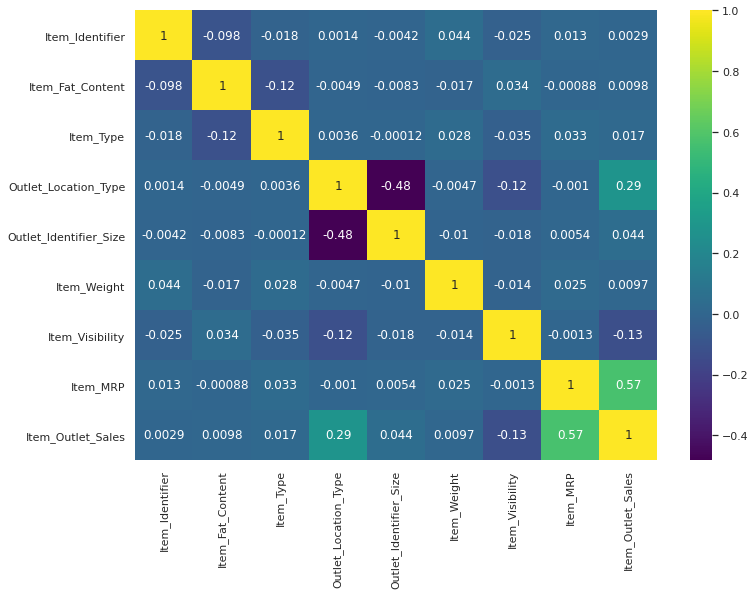

In [264]:
sns.heatmap(final_train.corr(), annot=True, cmap='viridis')

In [265]:
X = final_train.drop(columns='Item_Outlet_Sales', axis=1)
y = final_train["Item_Outlet_Sales"]

In [266]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [267]:
x_train.isna().sum()

Item_Identifier           0
Item_Fat_Content          0
Item_Type                 0
Outlet_Location_Type      0
Outlet_Identifier_Size    0
Item_Weight               0
Item_Visibility           0
Item_MRP                  0
dtype: int64

In [329]:
from sklearn.metrics import mean_squared_error as mse
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
lr_model = RandomForestRegressor()
y_pred = lr_model.fit(x_train, y_train)

In [330]:
pred = y_pred.predict(x_test)

In [331]:
print(lr_model.score(x_test, y_test)) 

0.5461709083217667


In [332]:
mse(y_test, pred, squared=False)

1118.9746004651624

# Test Model

In [363]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [364]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
cat_test = test.select_dtypes(include=['object'])
cat_test = cat_test.fillna(cat_test["Outlet_Size"].value_counts().index[0])
cat_test = cat_test.apply(LabelEncoder().fit_transform)
cat_test[['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']] = sc.fit_transform(cat_test[['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']])

In [365]:
cat_test["Outlet_Identifier_Size"] = (cat_test["Outlet_Identifier"] + cat_test["Outlet_Size"])/2
cat_test["Outlet_Location_Type"] = (cat_test["Outlet_Location_Type"] + cat_test["Outlet_Location_Type"])/2

In [366]:
cat_test = cat_test.drop(columns=["Outlet_Identifier", "Outlet_Size", 'Outlet_Type'], axis=1)

In [367]:
num_test = test.select_dtypes(include=['float64'])
num_test = num_test.replace(r'^\s*$', np.nan, regex=True)
num_test = num_test.fillna(num_test.Item_Weight.median())
num_test.isna().sum()

Item_Weight        0
Item_Visibility    0
Item_MRP           0
dtype: int64

In [368]:
test_frames = [num_test, cat_test]
final_test = pd.concat(test_frames, axis=1)

In [369]:
final_test

,Item_Weight,Item_Visibility,Item_MRP,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Location_Type,Outlet_Identifier_Size
0,20.750,0.007565,107.8622,0.739896,-0.575284,1.366916,-1.369215,0.611476
1,8.300,0.038428,87.3198,0.659085,4.104698,-0.766450,-0.138827,-0.622243
2,14.600,0.099575,241.7538,1.420050,-0.575284,0.892835,1.091560,-0.974734
3,7.315,0.015388,155.0340,0.079943,-0.575284,1.366916,-0.138827,-0.622243
4,12.500,0.118599,234.2300,0.921719,0.984710,-0.766450,1.091560,-0.093506
...,...,...,...,...,...,...,...,...
5676,10.500,0.013496,141.3154,-1.217514,0.984710,1.366916,-1.369215,1.268182
5677,7.600,0.142991,169.1448,-1.049159,0.984710,1.840998,1.091560,-0.445997
5678,10.000,0.073529,118.7440,1.433519,-0.575284,0.181713,-0.138827,0.258985
5679,15.300,0.000000,214.6218,-0.575520,0.984710,-1.003490,-0.138827,-0.622243


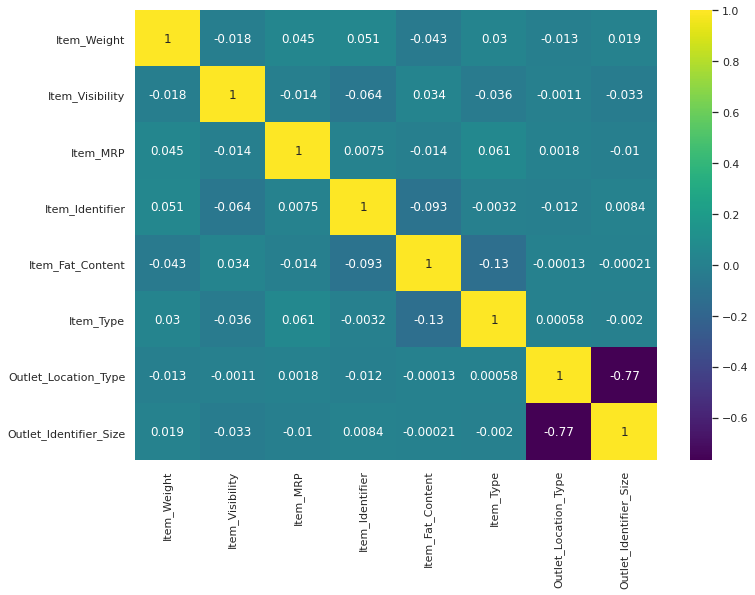

In [370]:
sns.heatmap(final_test.corr(), cmap='viridis', annot=True)

In [376]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [373]:
preds = y_pred.predict(final_test)

In [377]:
submission = pd.DataFrame({'Item_Identifier':test['Item_Identifier'], 'Outlet_Identifier':test['Outlet_Identifier'], 'Item_Outlet_Sales':preds})

In [379]:
submission.to_csv("Submit.csv", index=False)